# Датасет

Были спаршены данные с агрегатора avito.ru

**Фичи**

- `id` = "Id"
- `Цена` = "Price"
- `Адрес`= "Address" 
- `Ближайшее_метро`= "Nearest_Subway"
- `Дата_публикации`= "Publication_date"
- `Количество_комнат`= "Num_of_rooms"
- `Общая_площадь`= "Total_area"
- `Жилая_площадь`= "Living_space"
- `Этаж`= "Floor"
- `Балкон_или_лоджия`= "Balcony"
- `Тип_комнат`= "Room_type"
- `Высота_потолков`= "Ceiling_height"
- `Санузел`= "Bathroom"
- `Окна`= "Windows"
- `Ремонт`= "Repair"
- `Мебель`= "Furniture"
- `Тёплый_пол`= "Warm_floor"
- `Отделка`= "Decoration"
- `Техника`= "Appliances"
- `Способ_продажи`= "Sale_method"
- `Вид_сделки`= "Deal_type"
- `Тип_дома`= "House_type"
- `Год_постройки`= "Year_build"
- `Этажей_в_доме`= "Floors_in_house"
- `Пассажирский_лифт`= "Passenger_lift"
- `Парковка`= "Parking"
- `В_доме`= "In_house"
- `Двор`= "Yard"
- `Грузовой_лифт`= "Cargo_lift"
- `Название_новостройки`= New_building_name"
- `Корпус_строение`= "Building"
- `Официальный_застройщик`= "Official_developer"
- `Тип_участия`= "Participation_type"
- `Срок_сдачи`= "Due_date"
- `Ссылка`= "Link"
- `Координаты`= "Coordinates"
- `ВМО`= "WMO"
- `Район`= "Area"

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'C:/Users/konst/PetProject-price-real-estate-in-St.-Petersburg/parser/avito.csv'
df = pd.read_csv(path)

In [3]:
df.head(1)

,id,Цена,Адрес,Ближайшее_метро,Дата_публикации,Количество_комнат,Общая_площадь,Жилая_площадь,Этаж,Балкон_или_лоджия,...,Грузовой_лифт,Название_новостройки,Корпус_строение,Официальный_застройщик,Тип_участия,Срок_сдачи,Ссылка,Координаты,ВМО,Район
0,105724302,9800000,"Санкт-Петербург, Пушкинский р-н, пос. Шушары, ...",NaN,17.10.2022 в 10:16,3,73 м²,NaN,1 из 5,балкон,...,NaN,NaN,NaN,NaN,NaN,NaN,https://avito.ru//sankt-peterburg/kvartiry/3-k...,"59.737926, 30.461476",Шушары,Пушкинский


**Для начала переименуем наши фичи.**

In [4]:
# смотрим как изначально называются наши фичи.
df.columns

Index(['id', 'Цена', 'Адрес', 'Ближайшее_метро', 'Дата_публикации',
       'Количество_комнат', 'Общая_площадь', 'Жилая_площадь', 'Этаж',
       'Балкон_или_лоджия', 'Тип_комнат', 'Высота_потолков', 'Санузел', 'Окна',
       'Ремонт', 'Мебель', 'Тёплый_пол', 'Отделка', 'Техника',
       'Способ_продажи', 'Вид_сделки', 'Тип_дома', 'Год_постройки',
       'Этажей_в_доме', 'Пассажирский_лифт', 'Парковка', 'В_доме', 'Двор',
       'Грузовой_лифт', 'Название_новостройки', 'Корпус_строение',
       'Официальный_застройщик', 'Тип_участия', 'Срок_сдачи', 'Ссылка',
       'Координаты', 'ВМО', 'Район'],
      dtype='object')

In [5]:
new_names = [
    "Id", "Price", "Address", "Nearest_Subway", "Publication_date", "Num_of_rooms", 
    "Total_area", "Living_space", "Floor", "Balcony", "Room_type", 
    "Ceiling_height", "Bathroom", "Windows", "Repair", "Furniture", "Warm_floor",
    "Decoration", "Appliances", "Sale_method", "Deal_type", "House_type",
    "Year_build", "Floors_in_house", "Passenger_lift", "Parking", "In_house",
    "Yard", "Cargo_lift", "New_building_name", "Building", "Official_developer",
    "Participation_type", "Due_date", "Link", "Coordinates", "WMO", "Area"
 ]
mapper = {key:value for key, value in zip(df.columns.values, new_names)}

df.rename(columns=mapper, inplace=True)

Для начала посмотрим на первые и последние 5 строк наших данных.

In [6]:
df.head()

,Id,Price,Address,Nearest_Subway,Publication_date,Num_of_rooms,Total_area,Living_space,Floor,Balcony,...,Cargo_lift,New_building_name,Building,Official_developer,Participation_type,Due_date,Link,Coordinates,WMO,Area
0,105724302,9800000,"Санкт-Петербург, Пушкинский р-н, пос. Шушары, ...",NaN,17.10.2022 в 10:16,3,73 м²,NaN,1 из 5,балкон,...,NaN,NaN,NaN,NaN,NaN,NaN,https://avito.ru//sankt-peterburg/kvartiry/3-k...,"59.737926, 30.461476",Шушары,Пушкинский
1,110963888,24000000,"Санкт-Петербург, наб. реки Фонтанки, 28",Гостиный двор11–15 мин.Невский проспект11–15 м...,17.10.2022 в 01:22,3,85 м²,NaN,3 из 5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://avito.ru//sankt-peterburg/kvartiry/3-k...,"59.939086, 30.343213",Литейный округ,Центральный
2,128257189,12500000,"Санкт-Петербург, Камышовая ул., 3к1",Комендантский проспект6–10 мин.Старая деревняо...,22.10.2022 в 10:29,2,55 м²,NaN,8 из 12,лоджия,...,нет,NaN,NaN,NaN,NaN,NaN,https://avito.ru//sankt-peterburg/kvartiry/2-k...,"60.005504, 30.254046",округ Озеро Долгое,Приморский
3,139963851,14200000,"Санкт-Петербург, ул. Беринга, 1",Приморскаяот 31 мин.Василеостровскаяот 31 мин.,21.10.2022 в 16:53,1,50 м²,32 м²,17 из 17,балкон,...,1,NaN,NaN,NaN,NaN,NaN,https://avito.ru//sankt-peterburg/kvartiry/1-k...,"59.935831, 30.249087",округ Гавань,Василеостровский
4,204005328,5500000,"Санкт-Петербург, Пулковская ул., 8к2",Звёздная6–10 мин.Купчино21–30 мин.Московская21...,16.10.2022 в 03:52,студия,26 м²,14 м²,9 из 25,балкон,...,NaN,NaN,NaN,NaN,NaN,NaN,https://avito.ru//sankt-peterburg/kvartiry/kva...,"59.838028, 30.352169",округ Звёздное,Московский


In [7]:
df.tail()

,Id,Price,Address,Nearest_Subway,Publication_date,Num_of_rooms,Total_area,Living_space,Floor,Balcony,...,Cargo_lift,New_building_name,Building,Official_developer,Participation_type,Due_date,Link,Coordinates,WMO,Area
20230,2666088270,8047000,"Санкт-Петербург, пр-т Просвещения",Проспект Просвещенияот 31 мин.Озеркиот 31 мин....,24.10.2022 в 08:51,2,58.1 м²,NaN,11 из 25,балкон,...,NaN,NaN,NaN,NaN,NaN,NaN,https://avito.ru//sankt-peterburg/kvartiry/2-k...,"60.045763, 30.369192",округ № 15,Выборгский
20231,2666090487,6400000,"пр-т Ветеранов, стр. 5.2",р-н Красносельский,24.10.2022 в 16:19,1,31.7 м²,NaN,2 из 4,балкон,...,NaN,ЖК «Солнечный город. Резиденции»,Корпус 5.2,ООО «Специализированный застройщик «СЭТЛ ИНВЕСТ»,ДДУ по ФЗ 214,4 кв. 2022 года,https://avito.ru//sankt-peterburg/kvartiry/1-k...,"59.846143, 30.250228",округ Дачное,Кировский
20232,2666487955,10500000,"Санкт-Петербург, 1-й Рабфаковский пер., 6",Пролетарская16–20 мин.Обухово21–30 мин.Ломонос...,24.10.2022 в 13:33,2,68 м²,NaN,1 из 5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://avito.ru//sankt-peterburg/kvartiry/2-k...,"59.858119, 30.475121",Обуховский округ,Невский
20233,2666654791,9900000,"Измайловский б-р, уч. 4",Балтийская21–30 мин.Московские ворота21–30 мин...,24.10.2022 в 11:05,1,33 м²,12 м²,5 из 18,лоджия,...,2,Квартал «Галактика»,"Корпус 9.3, стр. 2 (уч. 4)",ООО «Специализированный Застройщик «Эталон Гал...,ДДУ по ФЗ 214,4 кв. 2022 года,https://avito.ru//sankt-peterburg/kvartiry/1-k...,"59.903968, 30.306822",округ Измайловское,Адмиралтейский
20234,2666736099,15500000,"Санкт-Петербург, Суздальское ш., 18к2",Проспект Просвещенияот 31 мин.Парнасот 31 мин....,24.10.2022 в 12:51,2,62 м²,50 м²,8 из 20,балкон,...,2,NaN,NaN,NaN,NaN,NaN,https://avito.ru//sankt-peterburg/kvartiry/2-k...,"60.059813, 30.280322",округ Коломяги,Приморский


In [8]:
df.columns

Index(['Id', 'Price', 'Address', 'Nearest_Subway', 'Publication_date',
       'Num_of_rooms', 'Total_area', 'Living_space', 'Floor', 'Balcony',
       'Room_type', 'Ceiling_height', 'Bathroom', 'Windows', 'Repair',
       'Furniture', 'Warm_floor', 'Decoration', 'Appliances', 'Sale_method',
       'Deal_type', 'House_type', 'Year_build', 'Floors_in_house',
       'Passenger_lift', 'Parking', 'In_house', 'Yard', 'Cargo_lift',
       'New_building_name', 'Building', 'Official_developer',
       'Participation_type', 'Due_date', 'Link', 'Coordinates', 'WMO', 'Area'],
      dtype='object')

In [9]:
#сразу сохраним наш датафрейм с новомыми фичами в отдельный файл
df.to_csv('df_english.csv', index=False) 

In [10]:
# смотрим на общее количество наших данных, сколько строк и столбцов содержится. 
df.shape

(20235, 38)

In [11]:
# посмотрим общую информацию о наших данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20235 entries, 0 to 20234
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  20235 non-null  int64  
 1   Price               20235 non-null  int64  
 2   Address             20231 non-null  object 
 3   Nearest_Subway      18219 non-null  object 
 4   Publication_date    20235 non-null  object 
 5   Num_of_rooms        20222 non-null  object 
 6   Total_area          20222 non-null  object 
 7   Living_space        17389 non-null  object 
 8   Floor               20222 non-null  object 
 9   Balcony             13758 non-null  object 
 10  Room_type           9767 non-null   object 
 11  Ceiling_height      10107 non-null  object 
 12  Bathroom            15669 non-null  object 
 13  Windows             13277 non-null  object 
 14  Repair              12817 non-null  object 
 15  Furniture           4709 non-null   object 
 16  Warm

In [12]:
# посмотрим сколько всего пропусков по всем столбцам.
# составим процентный список пропущенных значений
# упорядочем все сверху вниз
def missingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False) / len(df)*100, 2)
    temp = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return temp.loc[(temp['Total'] > 0)]

missingValuesInfo(df)

,Total,Percent
Warm_floor,18966,93.73
Appliances,16850,83.27
In_house,15590,77.04
Furniture,15526,76.73
Building,14730,72.79
Due_date,13604,67.23
Participation_type,13604,67.23
Official_developer,13604,67.23
New_building_name,13530,66.86
Decoration,13324,65.85


Видно, что пропусков содержится очень много, с большей долей вероятности можно сделать предположение о том, что такая ситуация сложилаь в виду того, что продавцы сайта avito не всегда заполняют те или иные параметры в объявлении.

<AxesSubplot:>

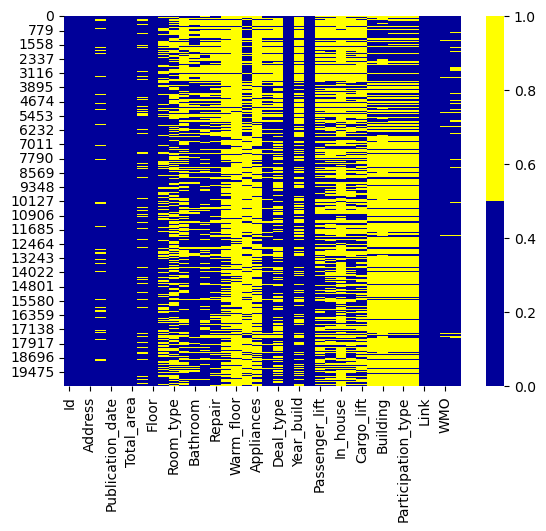

In [13]:
# выведем все это в виде графической таблицы.
cols = df.columns[:]
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [14]:
#Посмотрим есть ли у нас полностью пропущенные строки
def count_none():
    for col in df.columns:
        nasum = df[col].isna().sum()
    print(f'{col} - {nasum} none entries')
count_none()
none_rows = np.all(df.isna().values, axis=1)
num_none_rows = none_rows.sum()
print(f'Количество полностью пустых строк = {num_none_rows}')
     

Area - 1430 none entries
Количество полностью пустых строк = 0


Как видно полностью пустые строки у нас отсутствуют это уже хорошо

In [15]:
#посмотрим имеются ли у нас повторяющиеся записи
df.duplicated().sum()

0

In [16]:
#дубли по адресу
df['Address'].nunique() / len(df)

0.36258957252285645

Более 63% объектов имеют повторяющиеся значения в адресе. Другими словами, в среднем, каждый адрес упоминается в датафрейме 3 раза.

Тем не менее, рассмотрение дубликатов только по одному признаку представляется нецелесообразным. Для повышения вероятности нахождения дубликатов рассмотрим их наличие в 3х столбцах - Адрес, Общая_площадь, Этаж.

In [17]:
df[['Address', 'Total_area', 'Floor']].duplicated().sum() / len(df)

0.033110946380034596

Чуть более 3% данных попадают под указанный критерий, что может расцениваться как правдоподоный результат.

In [18]:
# посмотрим на количество уникальных значений по всем фичам
df.nunique()

Id                    20235
Price                  7266
Address                7337
Nearest_Subway         2269
Publication_date       7690
Num_of_rooms             12
Total_area             1535
Living_space            942
Floor                   433
Balcony                   3
Room_type                 3
Ceiling_height           89
Bathroom                  3
Windows                   7
Repair                    4
Furniture                 7
Warm_floor                1
Decoration                3
Appliances               38
Sale_method               5
Deal_type                 6
House_type                6
Year_build              211
Floors_in_house          36
Passenger_lift            5
Parking                  15
In_house                  7
Yard                      7
Cargo_lift                5
New_building_name       283
Building                501
Official_developer      233
Participation_type        3
Due_date                 20
Link                  20235
Coordinates         

Сразу смотрим, какие именно уникальные значения содержаться в фичах, которые нас интересуют. Нас будут интересовать следующие фичи:
- `Balcony`
- `Room_type`
- `Bathroom`
- `Yard`
- `Repair`
- `Furniture`
- `Decoration`
- `House_type`
- `Passenger_lift`
- `Cargo_lift`
- `Participation_type`
- `WMO`
- `Area`


In [19]:
for col in [
    "Balcony", "Room_type", "Bathroom", "Yard", 
    "Repair", "Furniture", "Decoration", "House_type",
    "Passenger_lift", "Cargo_lift", "Participation_type",
    "WMO", "Area", "Appliances", "Num_of_rooms"
]:
    print(f'{col}: {df[col][df[col].notna()].unique()}\n{"="*75}')

Balcony: ['балкон' 'лоджия' 'балкон, лоджия']
Room_type: ['изолированные' 'изолированные, смежные' 'смежные']
Bathroom: ['раздельный' 'совмещенный' 'совмещенный, раздельный']
Yard: ['детская площадка' 'закрытая территория'
 'закрытая территория, детская площадка'
 'детская площадка, спортивная площадка'
 'закрытая территория, детская площадка, спортивная площадка'
 'спортивная площадка' 'закрытая территория, спортивная площадка']
Repair: ['косметический' 'дизайнерский' 'требует ремонта' 'евро']
Furniture: ['кухня' 'кухня, хранение одежды, спальные места' 'кухня, спальные места'
 'хранение одежды' 'кухня, хранение одежды' 'спальные места'
 'хранение одежды, спальные места']
Decoration: ['чистовая' 'предчистовая' 'без отделки']
House_type: ['кирпичный' 'панельный' 'монолитный' 'монолитно-кирпичный' 'блочный'
 'деревянный']
Passenger_lift: ['2' '1' '3' 'нет' '4']
Cargo_lift: ['нет' '1' '2' '4' '3']
Participation_type: ['другое' 'ДДУ по ФЗ 214' 'ЖСК']
WMO: ['Шушары' 'Литейный округ' 'округ

In [20]:
sum(df['Num_of_rooms'] == 'свободная планировка')

28

In [21]:
for col in [
    "Balcony", "Bathroom", "Sale_method", 
        "House_type"
]:
    print(f'{col}: {df[col][df[col].notna()].unique()}\n{"="*75}')

Balcony: ['балкон' 'лоджия' 'балкон, лоджия']
Bathroom: ['раздельный' 'совмещенный' 'совмещенный, раздельный']
Sale_method: ['свободная' 'альтернативная' 'переуступка' 'договор ЖСК'
 'договор долевого участия']
House_type: ['кирпичный' 'панельный' 'монолитный' 'монолитно-кирпичный' 'блочный'
 'деревянный']


Видно, что некоторые данные разделены некорректно, в связи с чем возникает псевдо уникальность.

Наша целевая переменная (target) - `Price`

In [22]:
# посмотрим на наш таргет
df['Price'].describe()

count    2.023500e+04
mean     1.350531e+07
std      8.066536e+07
min      7.689000e+03
25%      6.186144e+06
50%      8.580000e+06
75%      1.383198e+07
max      9.000000e+09
Name: Price, dtype: float64

Виден очень большой разброс в данных, что может быть как свидетельством мошеннической деятельности, так и ошибками пользователей при заполнении информации в объявлениях. Построим гистограмму значений между 25 и 75 перцентилями.

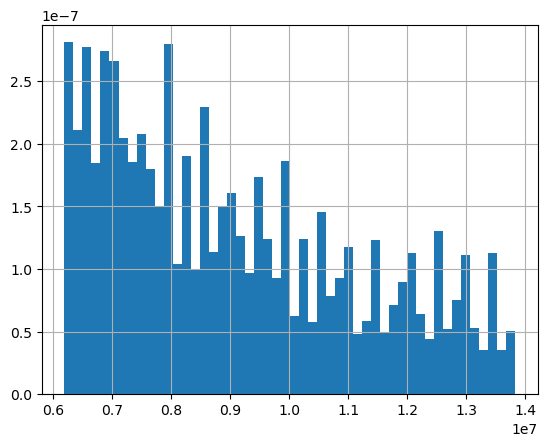

In [23]:
df[(df['Price'] >= np.percentile(df['Price'], 25)) & 
   (df['Price'] <= np.percentile(df['Price'], 75))]['Price'].hist(bins=50, density=True)
plt.show()

Гистограмма имеет очень рваный характер. Это обусловлено желанием пользователей объявить более "красивую" (округленную) цену. Такое распределение отрицательно скажется на точность работы моделей машинного обуения, так как абсолютно разные объекты обладают одинаковой стоимостью.

Нивелирование такого распределения можно достич введя в рассмотрение стоимость квадратного метра.

Также хочется посмотреть на наличие имеющихся выбросов в числовых фичах, а также на распределение признаков в категориальных. Для этого изначального оазобьем все наши фичи на числовые и категориальные.

In [24]:
#Для начала сразу же разобьем наши фичи на числовые и категориальные.
num_features = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
cat_features = [cname for cname in df.columns if df[cname].dtype == "object"]

Посмотрим на выбросы в числовых переменных

In [29]:
def outliners_visualization(df, num_features):
    
    """ 
    Визуализация для поиска выбросов в числовых фичах. 
    
    """
    
    for num in num_features:

        fig, ax = plt.subplots(2, figsize=(16, 12))
        fig.suptitle(num)
        
        ax[0].grid(axis='both')
        sns.scatterplot(x=df[num], y=df['Price'], ax=ax[0])
        
        ax[1].grid(axis='both')
        sns.boxplot(x=df[num], ax=ax[1])
        
        plt.show()

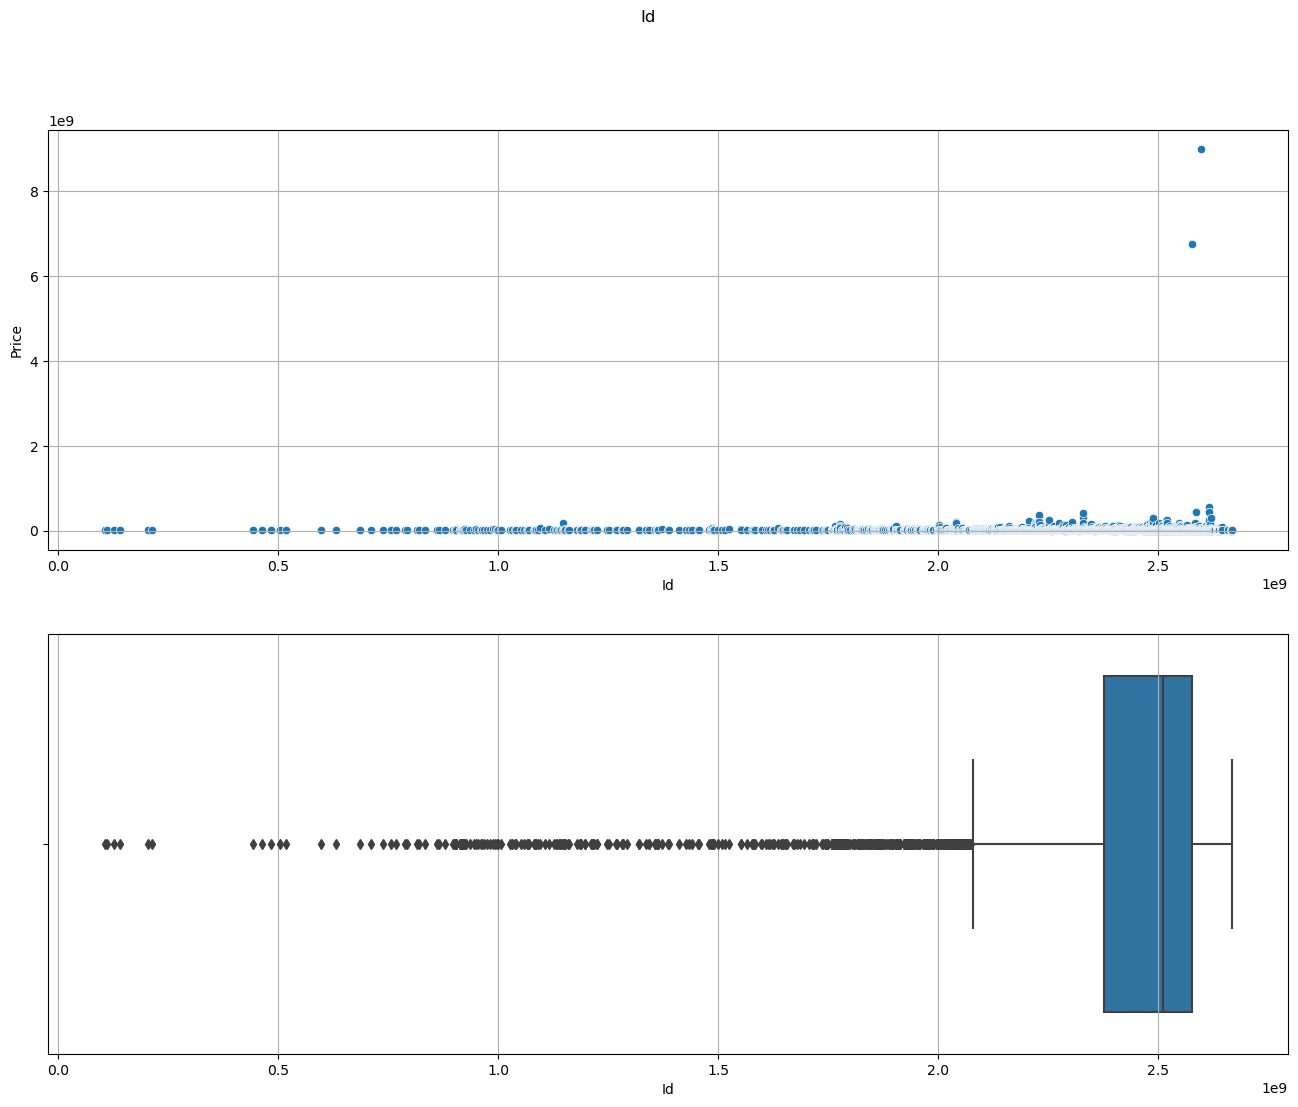

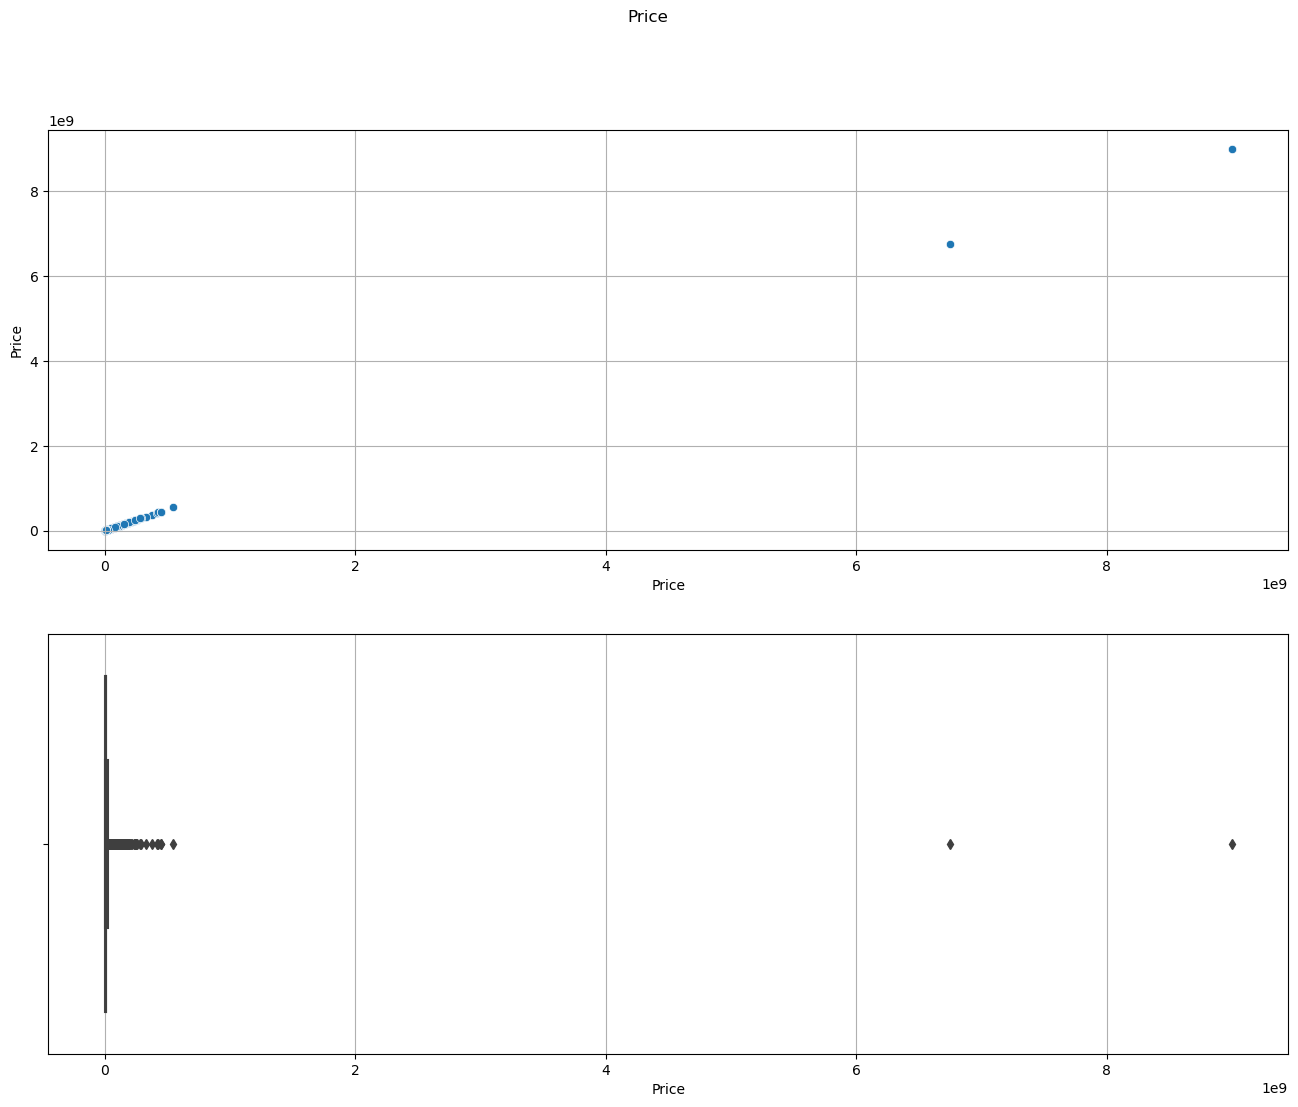

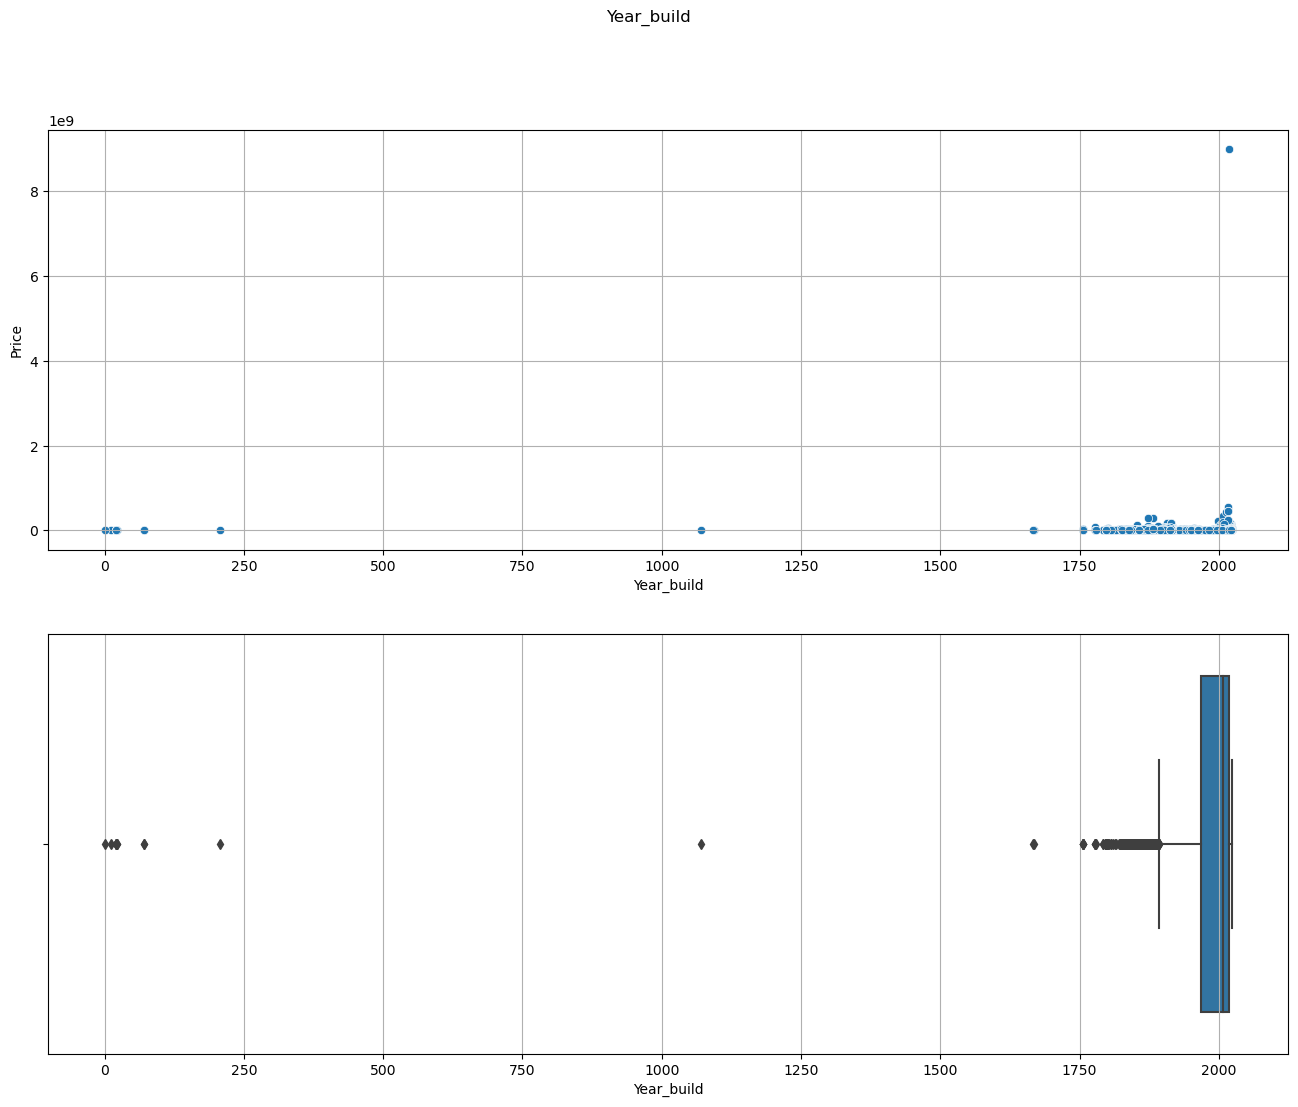

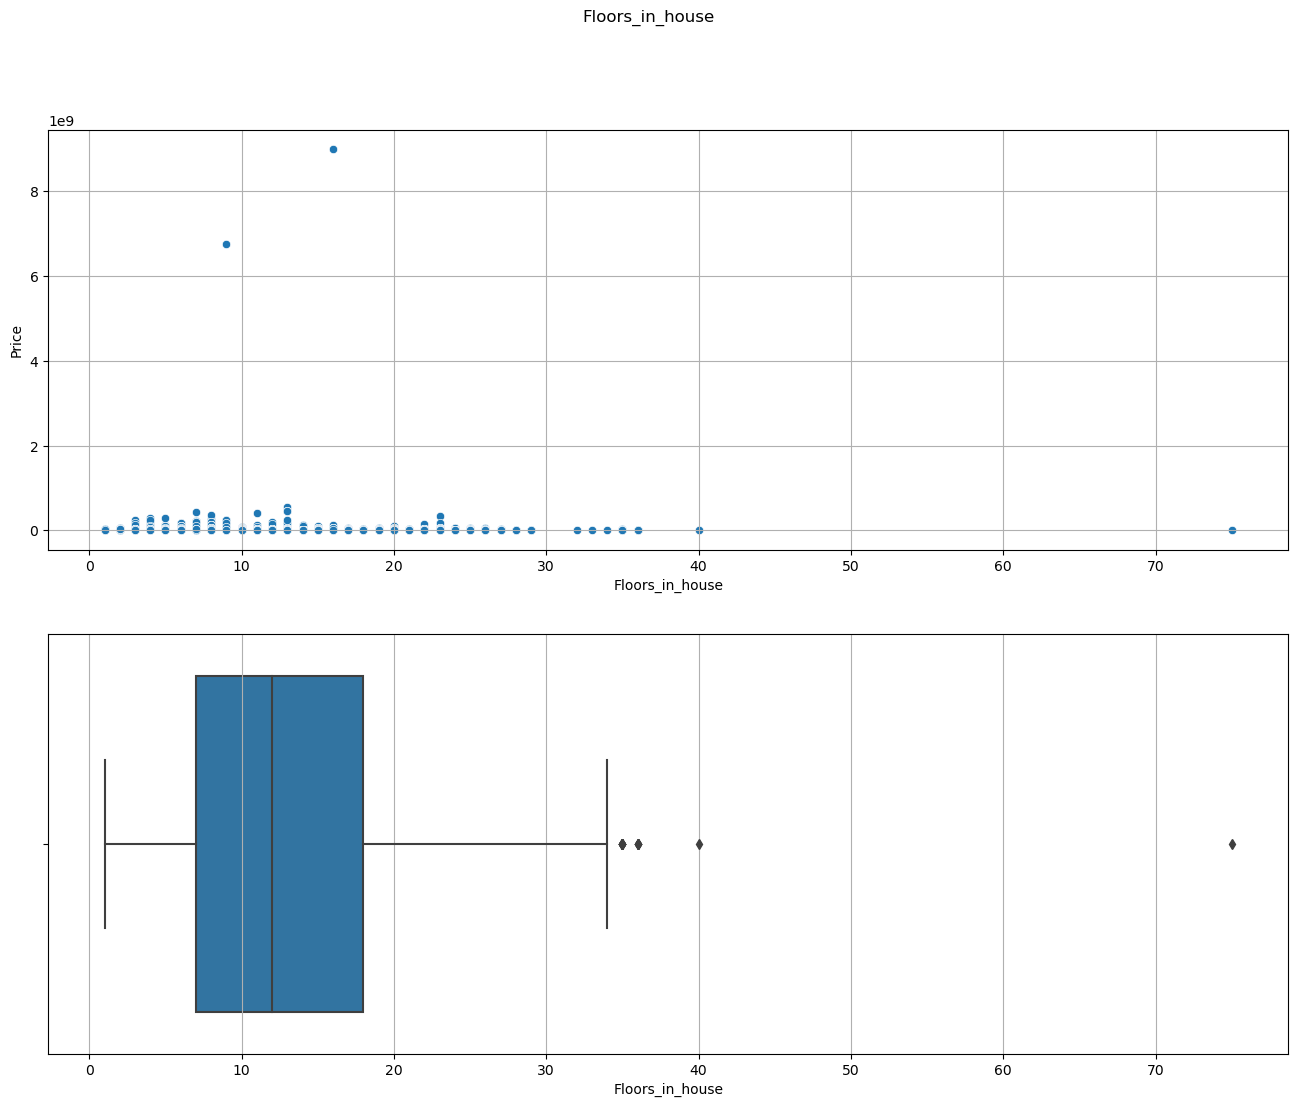

In [30]:
outliners_visualization(df, num_features)

Признак id для нас не является необходимым, немногим позже мы от него избавимся.
На боксплотах также можно увидеть выбросы в целевой переменной `Price`, о которых говорилось немногим выше.

Что касается годов пстроек дома, то мы видим, что в основном года сосредоточены в диапазоне от 1990 до 2003гг, что свидетельствует об относительно небольшом сроке эксплуатации домов, а как итог и о том, что дома находятся в не самом худшем состоянии.

Также видно, что в основном мы имеем дело с домами, в которых в среднем до 12 этажей. Также видно, что у нас есть дом, один дом, который сильно выбивается из общей картины и имеет аж свыше 70 этажей.


## Выводы.
Из первичного EDA видно можно сделать следующие выводы:
1. Есть признаки, которые будут лишь мешать при построение модели. От них нужно избавляться. Не несут никакой значимости для нашего проекта такие признаки, как например:
- `Id`;
- `Official_developer`; 
- `New_building_name`;
- `Building`;
- `link`
2. Также следует избавиться от фичей, в которых пропусков свыше 65% и есть дубликаты.
3. В фичах присутcвтуют лишние значения, которые предают псевдоуникальность, такие как например в признаке Balcony: 'балкон' 'лоджия' 'балкон, лоджия'. Нужно их разделить. 
4. В целевой переменной Price - есть выбросы, с которыми нужно будет бороться. Считаем нужным ввести новую целевую переменную, которая будет обозначать стоимость квадратного метра и рассчитываться по формуле Price/Total_area.
5. Также в рамках данного исследования были собраны данные за период с начала октября по середину ноября, в связи с чем, именно в этом исследование нам не потребуется признак `Publication_date`. Отметим, что если рассматривать выборку на длительном протяжении времени, то этот признак может быть весьма значимым в связи с изменчивостью стоимости рынка цен на недвижимость в зависимости от сезона. 